## Desafío 47 Validando Modelos y Métricas

#### Para iniciar,  realizamos el cargue de las librerias que nos permitiran trabajar el proyecto en Python

In [1]:
## CARGAR LA lIBRERIAS

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
from sklearn.covariance import EmpiricalCovariance, MinCovDet

import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score

np.set_printoptions(suppress=True)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Librería para RandomForest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Librerías para métricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score
import scipy 
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)
import scipy 


import warnings
warnings.filterwarnings("ignore")

In [2]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


#### Llamamos el dataset que contiene la informacion relevante para el análisis.

In [3]:
nueva_ruta = 'C:\\Users\\cf0163spc\\Desktop\\Python\\Data Cruda'

In [4]:
df=pd.read_csv('03 CSV data -- STC(A)_numerical dates .CSV')

#### Identificamos los encabezados de las columnas para darnos una idea ordenada de que contiene el dataset.

In [5]:
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


#### Traemos la información consolidada de las columnas que nos permitira identificar: el nombre de cada columna, con el número de regisros en cada una y el tipo de dato si es porcentaje, numero entero, entre otros. en este ejemplo vemos que existen 56 columnas con 2388 registros las que mas datos tiene.

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   int64  
 1   Program.Code                    2389 non-null   object 
 2   From.Grade                      2262 non-null   float64
 3   To.Grade                        2239 non-null   float64
 4   Group.State                     2389 non-null   object 
 5   Is.Non.Annual.                  2389 non-null   int64  
 6   Days                            2389 non-null   int64  
 7   Travel.Type                     2389 non-null   object 
 8   Departure.Date                  2389 non-null   int64  
 9   Return.Date                     2389 non-null   int64  
 10  Deposit.Date                    2389 non-null   int64  
 11  Special.Pay                     470 non-null    object 
 12  Tuition                         23

#### Posteriormente ejecutamos un describe, para conocer los promedios, el dato, mínimo, el máximo los cuartiles del dataset, que nos permitiran tomar decisiones para el análisis de los datos.

In [7]:
df.describe()

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,...,NumberOfMeetingswithParents,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
count,2389.000000,2262.000000,2239.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,2389.000000,...,2389.000000,2052.000000,2052.000000,2052.000000,2052.000000,2389.000000,2298.000000,2389.000000,2389.000000,2389.000000
mean,1195.000000,7.268347,7.912908,0.154039,4.575136,40670.764337,40674.498535,40475.821264,1615.217664,16.867727,...,1.102135,40408.495614,40441.601365,262.083821,228.978070,0.556718,0.066184,0.900667,2.953537,0.607367
std,689.789219,1.388350,1.558226,0.361062,1.432128,35.217643,35.243691,37.906251,645.096047,16.942782,...,0.611544,72.393761,43.666436,79.520208,53.636014,0.496877,0.081112,0.049119,2.876422,0.488439
min,1.000000,3.000000,3.000000,0.000000,1.000000,40557.000000,40557.000000,40081.000000,79.000000,0.000000,...,0.000000,39945.000000,39945.000000,-204.000000,-204.000000,0.000000,0.000922,0.600000,0.000000,0.000000
25%,598.000000,7.000000,8.000000,0.000000,4.000000,40642.000000,40645.000000,40466.000000,1174.000000,6.000000,...,1.000000,40404.250000,40429.000000,208.000000,196.750000,0.000000,0.020787,0.882353,1.000000,0.000000
50%,1195.000000,8.000000,8.000000,0.000000,5.000000,40680.000000,40683.000000,40479.000000,1700.000000,12.000000,...,1.000000,40435.000000,40442.000000,250.000000,233.000000,1.000000,0.045256,0.909091,2.000000,1.000000
75%,1792.000000,8.000000,8.000000,0.000000,5.000000,40701.000000,40704.000000,40487.000000,2048.000000,23.000000,...,1.000000,40449.000000,40451.000000,287.000000,261.000000,1.000000,0.087517,0.933333,4.000000,1.000000
max,2389.000000,12.000000,12.000000,1.000000,12.000000,40724.000000,40729.000000,40846.000000,4200.000000,257.000000,...,2.000000,40821.000000,40821.000000,749.000000,749.000000,1.000000,2.052632,1.000000,47.000000,1.000000


#### Con el ánimo de ver si tenemos registros duplicados, contamos los valores que presentan esta caracteristica y asi, definimos si hay que remediar o no esta situación. 

In [8]:
df.duplicated().value_counts()

False    2389
dtype: int64

#### En este caso no tuvimos registros duplicados.

### FEATURES CATEGORICAS

In [9]:
features_categoricas = df.select_dtypes(include=['object'])
features_categoricas.columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Special.Pay',
       'Poverty.Code', 'Region', 'School.Type', 'MDR.Low.Grade',
       'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh',
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

#### Definimos cuántos valores distintos tiene cada categoría?

In [10]:
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

Group.State            54
Program.Code           28
Income.Level           22
GroupGradeType         13
MDR.Low.Grade          12
SchoolGradeType         9
Poverty.Code            6
Region                  6
SPR.Product.Type        6
GroupGradeTypeLow       6
DepartureMonth          6
MajorProgramCode        4
GroupGradeTypeHigh      4
SchoolSizeIndicator     4
SchoolGradeTypeHigh     4
SchoolGradeTypeLow      4
School.Type             4
Travel.Type             4
Special.Pay             3
SPR.New.Existing        2
dtype: int64


####  Hacemos la selección de las variables categoricas que vamos a trabajar

In [11]:
col_aTransformar = valores_distintos.index[valores_distintos<=4]
col_aTransformar

Index(['Travel.Type', 'Special.Pay', 'School.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'GroupGradeTypeHigh',
       'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

### ONE HOT ENCODING

#### Para transformarlas, vamos a usar el método get_dummies de pandas, de esta manera las podemos usar en el dataset ya convertidas en unos y ceros, así: 

In [12]:
df_dummies = pd.get_dummies(df[col_aTransformar],drop_first=True)
df_dummies.head()

,Travel.Type_B,Travel.Type_N,Travel.Type_T,Special.Pay_FR,Special.Pay_SA,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,SPR.New.Existing_NEW,SchoolGradeTypeLow_High,...,SchoolGradeTypeHigh_Undefined,GroupGradeTypeHigh_High,GroupGradeTypeHigh_Middle,GroupGradeTypeHigh_Undefined,MajorProgramCode_H,MajorProgramCode_I,MajorProgramCode_S,SchoolSizeIndicator_M-L,SchoolSizeIndicator_S,SchoolSizeIndicator_S-M
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


####  Continuamos limpiando la data y validando otras variables categoricas que nos impactan.

In [13]:
df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['Days'] = df['Days'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['NumberOfMeetingswithParents'] = df['CRM.Segment'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')
df.info()

# se encontraron 10 variables que no estaban clasificadas correctamente, por lo cual las convertimos en tipo Categoricas.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              2389 non-null   int64   
 1   Program.Code                    2389 non-null   object  
 2   From.Grade                      2262 non-null   category
 3   To.Grade                        2239 non-null   category
 4   Group.State                     2389 non-null   object  
 5   Is.Non.Annual.                  2389 non-null   category
 6   Days                            2389 non-null   category
 7   Travel.Type                     2389 non-null   object  
 8   Departure.Date                  2389 non-null   int64   
 9   Return.Date                     2389 non-null   int64   
 10  Deposit.Date                    2389 non-null   int64   
 11  Special.Pay                     470 non-null    object  
 12  Tuition             

#### podemos observar que la mayoria de los estudiantes vienen del estado de California, y corresponde al 30% de los inscritos, seguido de Texas con un  12% el cual representa el 42% de nuestros registros.

In [14]:
df['Group.State'].value_counts() 

CA                718
TX                308
WA                147
IL                104
CO                 89
MI                 71
FL                 62
AZ                 53
OH                 53
MN                 51
OR                 51
WI                 46
IN                 43
MO                 43
NE                 42
TN                 38
MA                 36
IA                 35
OK                 33
LA                 31
KS                 26
GA                 22
AL                 21
NV                 20
NM                 20
NY                 19
VA                 18
KY                 16
NC                 16
MD                 15
CT                 15
ID                 14
SD                 11
AR                 10
SC                 10
HI                  9
MS                  9
UT                  9
ME                  7
NH                  7
MT                  6
NJ                  6
AK                  5
PA                  5
ND                  5
RI        

In [15]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

In [16]:
CombineRareCategories(df, 10)  

In [17]:
df[0:10]

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,Other_Travel.Type,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
5,6,HC,10.0,12.0,LA,0,4,A,40560,40563,...,High,High,High->High,H,0,0.010650,0.909091,1,L,1
6,7,SG,11.0,12.0,MA,1,6,A,40561,40566,...,High,High,High->High,S,0,0.111111,0.925926,2,S,0
7,8,Other_Program.Code,9.0,9.0,Other_Group.State,0,8,A,40567,40574,...,Undefined,Undefined,Undefined->Undefined,I,1,NaN,0.928571,1,NaN,0
8,9,CC,8.0,8.0,AZ,0,8,A,40572,40579,...,Middle,High,Middle->High,C,1,0.104000,0.928571,4,S-M,1
9,10,HD,8.0,8.0,TX,0,4,A,40581,40584,...,PK,Middle,PK->Middle,H,1,0.103937,0.916667,6,M-L,1


### REMPLAZO O IMPUTO DATOS FALTANTES

In [18]:
pd.DataFrame(df).isna().sum() 

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [19]:
for col in df:
    if df[col].isna().sum() != 0: 
        df[col + '_surrogate'] = df[col].isna().astype(int)


#### Encontramos 17 columnas con valores nulos, lo cual nos indica que debemos hacer imputacion de estos datos, a traves de los promedios de los mismos.

In [20]:
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df.select_dtypes(exclude=['int64','float64']))
df[df.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df.select_dtypes(exclude=['int64','float64']))

In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))


In [22]:
df[['Poverty.Code','Poverty.Code_surrogate']]


,Poverty.Code,Poverty.Code_surrogate
0,B,0
1,C,0
2,C,0
3,missing_value,1
4,D,0
...,...,...
2384,C,0
2385,C,0
2386,missing_value,1
2387,missing_value,1


#### Identificamos que a las variables cualitativas no se les puede aplicar el promedio, en este caso usariamos la moda de ser necesario.

In [23]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

In [24]:
pd.options.display.max_columns = None 

In [25]:
df.head()

,ID,Departure.Date,Return.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Early.RPL,Latest.RPL,Cancelled.Pax,Total.Discount.Pax,Initial.System.Date,Total.School.Enrollment,EZ.Pay.Take.Up.Rate,FPP,Total.Pax,SPR.Group.Revenue,FirstMeeting,LastMeeting,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.,Program.Code_CD,Program.Code_HC,Program.Code_HD,Program.Code_HG,Program.Code_HN,Program.Code_HO,Program.Code_HS,Program.Code_HVP,Program.Code_IC,Program.Code_Other_Program.Code,Program.Code_SC,Program.Code_SG,Program.Code_SK,Program.Code_SM,Program.Code_ST,From.Grade_4.0,From.Grade_5.0,From.Grade_6.0,From.Grade_7.0,From.Grade_8.0,From.Grade_9.0,From.Grade_10.0,From.Grade_11.0,From.Grade_12.0,From.Grade_missing_value,To.Grade_4.0,To.Grade_5.0,To.Grade_6.0,To.Grade_7.0,To.Grade_8.0,To.Grade_9.0,To.Grade_10.0,To.Grade_11.0,To.Grade_12.0,To.Grade_missing_value,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_IA,Group.State_ID,Group.State_IL,Group.State_IN,Group.State_KS,Group.State_KY,Group.State_LA,Group.State_MA,Group.State_MD,Group.State_MI,Group.State_MN,Group.State_MO,Group.State_NC,Group.State_NE,Group.State_NM,Group.State_NV,Group.State_NY,Group.State_OH,Group.State_OK,Group.State_OR,Group.State_Other_Group.State,Group.State_SC,Group.State_SD,Group.State_TN,Group.State_TX,Group.State_VA,Group.State_WA,Group.State_WI,Is.Non.Annual._1,Days_2,Days_3,Days_4,Days_5,Days_6,Days_7,Days_8,Days_9,Days_10,Days_11,Days_12,Travel.Type_B,Travel.Type_Other_Travel.Type,Special.Pay_FR,Special.Pay_SA,Special.Pay_missing_value,Poverty.Code_B,Poverty.Code_C,Poverty.Code_D,Poverty.Code_E,Poverty.Code_Other_Poverty.Code,Poverty.Code_missing_value,Region_Houston,Region_Northern California,Region_Other,Region_Pacific Northwest,Region_Southern California,CRM.Segment_2.0,CRM.Segment_3.0,CRM.Segment_4.0,CRM.Segment_5.0,CRM.Segment_6.0,CRM.Segment_7.0,CRM.Segment_8.0,CRM.Segment_9.0,CRM.Segment_10.0,CRM.Segment_11.0,CRM.Segment_missing_value,School.Type_Catholic,School.Type_PUBLIC,School.Type_Private non-Christian,Parent.Meeting.Flag_1,MDR.Low.Grade_4,MDR.Low.Grade_5,MDR.Low.Grade_6,MDR.Low.Grade_7,MDR.Low.Grade_8,MDR.Low.Grade_9,MDR.Low.Grade_K,MDR.Low.Grade_Other_MDR.Low.Grade,MDR.Low.Grade_PK,MDR.Low.Grade_missing_value,MDR.High.Grade_2.0,MDR.High.Grade_3.0,MDR.High.Grade_4.0,MDR.High.Grade_5.0,MDR.High.Grade_6.0,MDR.High.Grade_7.0,MDR.High.Grade_8.0,MDR.High.Grade_9.0,MDR.High.Grade_10.0,MDR.High.Grade_11.0,MDR.High.Grade_12.0,MDR.High.Grade_missing_value,Income.Level_B,Income.Level_C,Income.Level_D,Income.Level_E,Income.Level_F,Income.Level_G,Income.Level_H,Income.Level_I,Income.Level_J,Income.Level_K,Income.Level_L,Income.Level_M,Income.Level_N,Income.Level_O,Income.Level_Other_Income.Level,Income.Level_P,Income.Level_Q,Income.Level_Z,Income.Level_missing_value,School.Sponsor_1,SPR.Product.Type_Costa Rica,SPR.Product.Type_East Coast,SPR.Product.Type_International,SPR.Product.Type_Other_SPR.Product.Type,SPR.Product.Type_Science,SPR.New.Existing_NEW,NumberOfMeetingswithParents_2.0,NumberOfMeetingswithParents_3.0,NumberOfMeetingswithParents_4.0,NumberOfMeetingswithParents_5.0,NumberOfMeetingswithParents_6.0,NumberOfMeetingswithParents_7.0,NumberOfMeetingswithParents_8.0,NumberOfMeetingswithParents_9.0,NumberOfMeetingswithParents_10.0,NumberOfMeetingswithParents_11.0,NumberOfMeetingswithParents_missing_value,SchoolGradeTypeLow_High,SchoolGradeTypeLow_Middle,SchoolGradeTypeLow_Undefined,SchoolGradeTypeHigh_High,SchoolGradeTypeHigh_Middle,SchoolGradeTypeHigh_Undefined,SchoolGradeType_Elementary->Middle,SchoolGradeType_High->High,SchoolGradeType_Middle->High,SchoolGradeType_Middle->Middle,SchoolGradeType_Middle->Undefined,SchoolGradeType_Other_SchoolGradeType,SchoolGradeType_Undefined->Undefined,DepartureMonth_February,DepartureMonth_June,DepartureMonth_March,DepartureMonth_May,Departu

In [26]:
variable_Ingresos = df['SPR.Group.Revenue']
variable_Ingresos.describe()

count    2389.000000
mean     1615.217664
std       645.096047
min        79.000000
25%      1174.000000
50%      1700.000000
75%      2048.000000
max      4200.000000
Name: SPR.Group.Revenue, dtype: float64

(0.0, 7000.0)

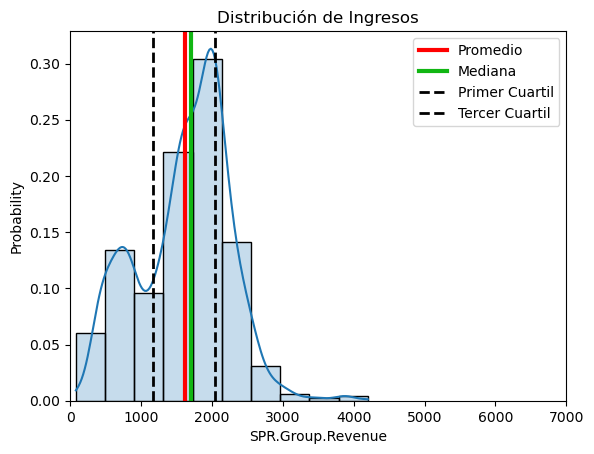

In [27]:
# Histograma variable 
# Primero calculo algunas medidas que quiero presentar 
media = variable_Ingresos.mean()
mediana = variable_Ingresos.median()
primer_cuartil = variable_Ingresos.quantile(0.25)
tercer_cuartil = variable_Ingresos.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SPR.Group.Revenue',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red',
             linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Ingresos')

ax = plt.gca()

plt.xlim(0, 7000)
           


(0.0, 0.3)

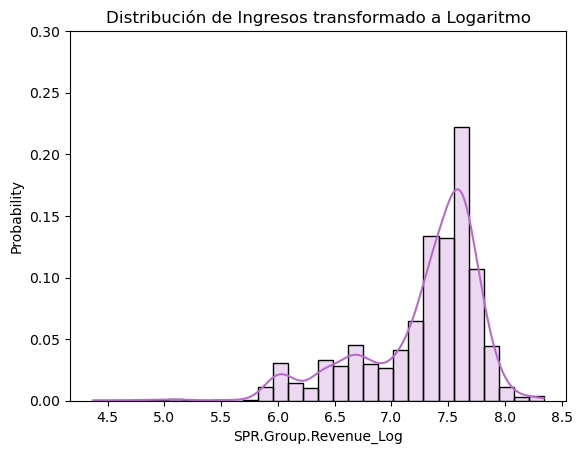

In [28]:
# Genero la variable logaritmica 
df['SPR.Group.Revenue_Log'] = np.log(df['SPR.Group.Revenue'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data= df,
             x = 'SPR.Group.Revenue_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Ingresos transformado a Logaritmo')

plt.ylim(0, 0.3)

#### Las principales metricas muestran unos resultados buenos por encima del 80% en Train desertaron 506 estudiantes de los que habiamos predicho y se retuvieron 1022, dandonos unas cifras confiables en el modelo.

# METRICAS DE CLUSTERING- DESAFIO 47

Buscamos con estas metricas que las observaciones dentro de los Cluster sean lo mas similares entre si y lo mas distintas posibles entre grupos de clusters, asi encontrar la forma natural de agrupar los datos. 

vamos a escoger 2 variables que son:
Tuition: Este es el precio que le cuesta a cada estudiante que paga la totalidad del valor para participar en el programa. hay programas mas costosos por los tiquetes y las distancias entre ciudad de origen vs ciudad base de la Institucion AAA SCHOOL. los viajes de ciudades mas cercanas se hace en bus o tren, lo que sugiere menos costos.

FRP.Active : FRP es el programa de reembolso completo. significa el precio del seguro de cancelación de viaje que compraron los estudiantes.

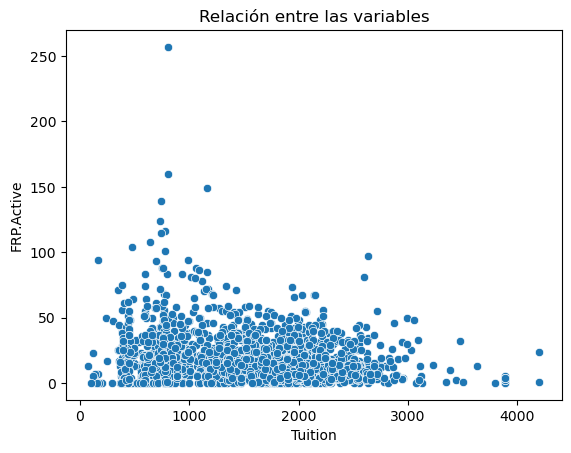

In [29]:
# Relación entre las variables
plt.figure()
sns.scatterplot(data = df,
                x = 'Tuition',
                y = 'FRP.Active') 
plt.title('Relación entre las variables')
plt.show()

In [30]:
# Separamos en train y test 
#Todos los clusters los voy a realizar sobre la muestra de enternamiento, la de testeo la uso solo 
# para verificar si se comportan igual


from sklearn.model_selection import train_test_split

# Se definen las Variables a procesar
features = ['Tuition','FRP.Active']

df_limpia = df.dropna(subset= features)
df_train,df_test = train_test_split(df_limpia,
                                    test_size = 0.3, #Porcentaje de muestra test 
                                    random_state = 43) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()


# Para que los modelos no tengan problemas porque las variables tengan unas escalas muy diferentes,
# se hace un escalamiento de las variables 
from sklearn.preprocessing import StandardScaler
X_train = df_train[features].values
X_test = df_test[features].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# Genero df
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)

df_train_scaled.head()

,Scaled_Tuition,Scaled_FRP.Active
0,-1.318750,4.898290
1,-1.343529,0.995683
2,-0.538209,1.053931
3,0.576849,0.063717
4,-1.885571,-0.344018


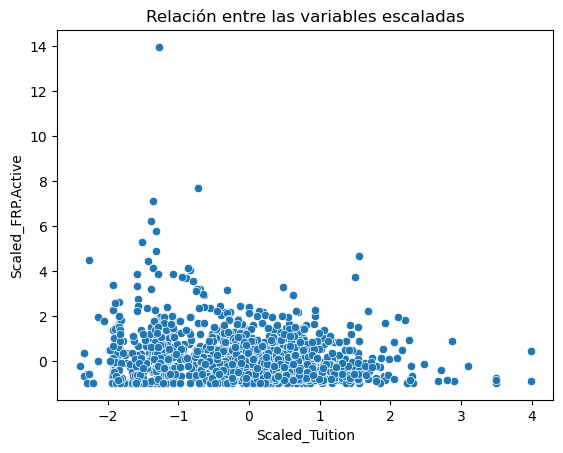

In [31]:
# Volvemos a Visualizar la Relación entre las variables ya escaladas
plt.figure()
sns.scatterplot(data = df_train_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active') 
plt.title('Relación entre las variables escaladas')
plt.show()

### Identificamos Outliers

In [32]:
from sklearn.ensemble import IsolationForest

# Genero las matrices sin NAs para correr el algoritmo
X_train = df_train_scaled.values
X_test = df_test_scaled.values

# Identificar outliers en el dataset de train
iso = IsolationForest(contamination = 0.005) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)

# Marco Outlier en train
df_train_scaled['EsOutlier'] = yhat == (-1)

# En test: 
yhat_test = iso.predict(X_test)
df_test_scaled['EsOutlier'] = yhat_test == (-1)

df_train_scaled.head()

,Scaled_Tuition,Scaled_FRP.Active,EsOutlier
0,-1.318750,4.898290,False
1,-1.343529,0.995683,False
2,-0.538209,1.053931,False
3,0.576849,0.063717,False
4,-1.885571,-0.344018,False


Text(0.5, 1.0, 'Identificación Outliers')

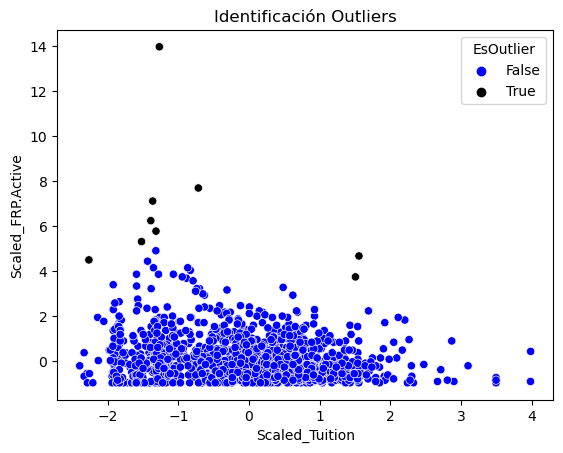

In [33]:
# Visualizo train, para ver los principales outliers
plt.figure()
sns.scatterplot(data = df_train_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active',
                hue = 'EsOutlier',               
                palette={0: 'blue', 1: 'black'})
plt.title('Identificación Outliers')

Con el animo de continuar con la construccion de los Cluster, dejo por fuera los Outliers, para este desafìo

### ESTRATEGIA PARA ARMAR LOS CLUSTER

Text(0.5, 1.0, 'Relación de variables SIN Outliers')

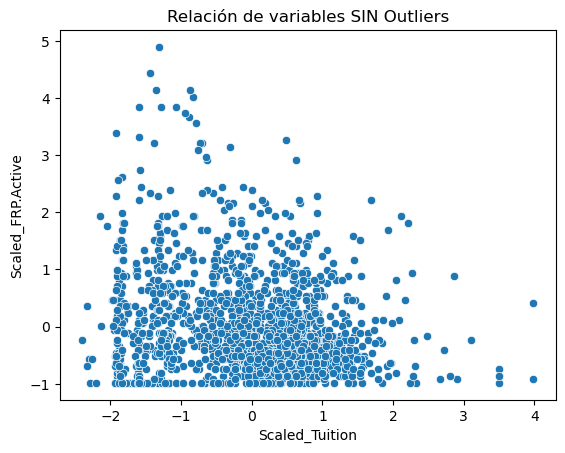

In [34]:
# Filtro
df_train_scaled = df_train_scaled.loc[df_train_scaled['EsOutlier'] == 0,]
df_test_scaled = df_test_scaled.loc[df_test_scaled['EsOutlier'] == 0,]

df_train_scaled = df_train_scaled.drop(columns=['EsOutlier'])
df_test_scaled = df_test_scaled.drop(columns=['EsOutlier'])

# Visualizo train para ver la relacion sin Outliers
plt.figure()
sns.scatterplot(data = df_train_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active')
plt.title('Relación de variables SIN Outliers')

## K-Means 

Con el animo de interpretar bien las metricas, vamos a generar una clasificacion de 2 clusters apoyados en el logaritmo de K-means

In [35]:
# K Means
X_train = df_train_scaled.values
X_test = df_test_scaled.values

kmeans = KMeans(n_clusters = 2, ## defino que sean 2 clusters
                init = 'k-means++', ## defino que inicialice los centroides
                random_state = 42, ## defino la semilla
                max_iter = 100,
                tol = 0.05,
                n_init = 10) 

y_kmeans_train = kmeans.fit_predict(X_train) ## genero los grupos con Train
y_kmeans_test = kmeans.predict(X_test) ## en test simplemente le digo que tome el predict

df_train_scaled['Cluster_KMeans'] = y_kmeans_train
df_test_scaled['Cluster_KMeans'] = y_kmeans_test
df_train_scaled.head() ## visualizo dataframe que tiene la variable escalada de Tuition, la variable escalada de FRP.Active y 
## la clasificacion que me generò el modelo de KMeans

,Scaled_Tuition,Scaled_FRP.Active,Cluster_KMeans
0,-1.318750,4.898290,1
1,-1.343529,0.995683,1
2,-0.538209,1.053931,1
3,0.576849,0.063717,0
4,-1.885571,-0.344018,1


Text(0.5, 1.0, 'K-Means (k = 2) - Test')

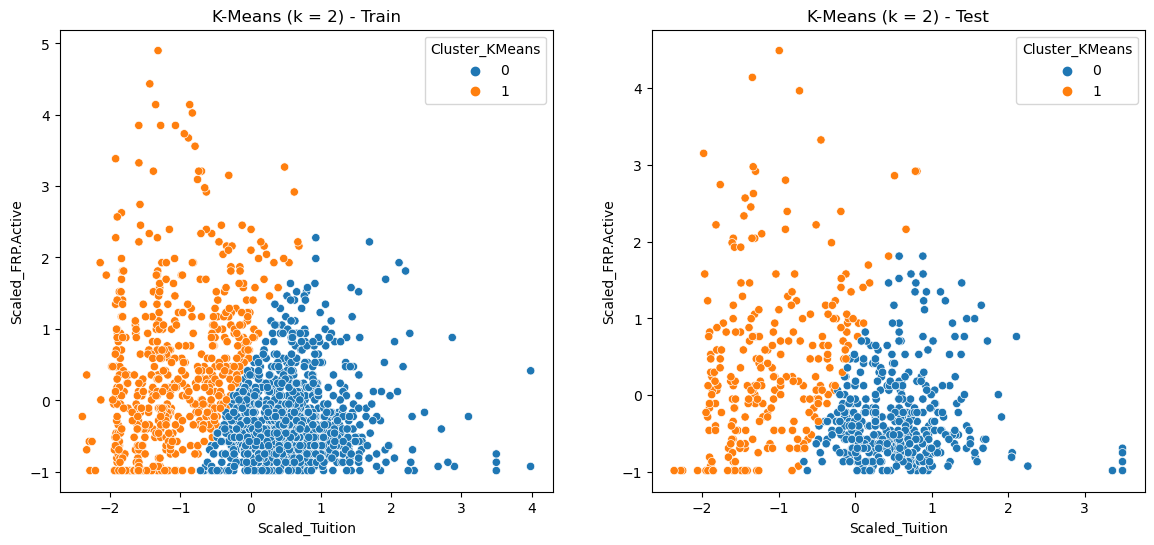

In [36]:
# Visualizo
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

df_train_scaled['Cluster_KMeans'] = df_train_scaled['Cluster_KMeans'].astype('category')
sns.scatterplot(data = df_train_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active',
                hue = 'Cluster_KMeans',
                ax = axs[0])
axs[0].set_title('K-Means (k = 2) - Train')


df_test_scaled['Cluster_KMeans'] = df_test_scaled['Cluster_KMeans'].astype('category')
sns.scatterplot(data = df_test_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active',
                hue = 'Cluster_KMeans',
                ax = axs[1])
axs[1].set_title('K-Means (k = 2) - Test')

## el gráfico me muestra en color azul todos los 0 y en color amarillo todos los 1, 
## los dos grupos basados en Train, lo que hacemos es verificar si en test tiene el mismo comportamiento y efectivamente todos los naranjas quedan al costado izquierdo y los azules al derecho, tanto en train como en test.

## Entendiendo que contiene cada uno de los Cluster

Más allá de las métricas para saber qué tan buenos fueron los agrupamientos, podemos intentar entender qué contiene cada cluster estudiando distribuciones de las variables por cluster, y ciertas medidas de agregación interesantes como promedios o medianas.

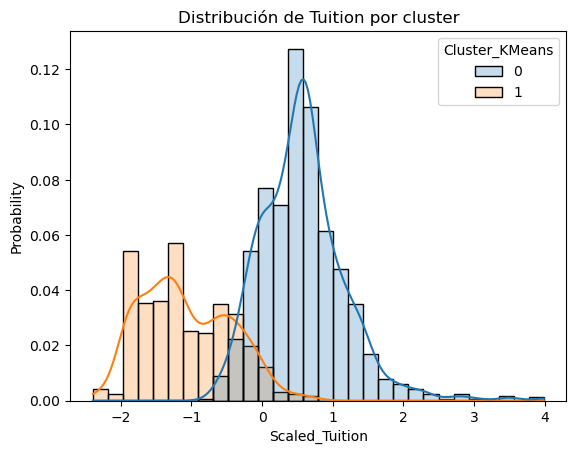

In [37]:
# Histograma
plt.figure()
sns.histplot(data = df_train_scaled,
             x = 'Scaled_Tuition',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_KMeans')
plt.title('Distribución de Tuition por cluster')
plt.show() ## podemos observar en este histograma que los datos del grupo cero o azul son mas grandes que los del grupo 1 amarillo.

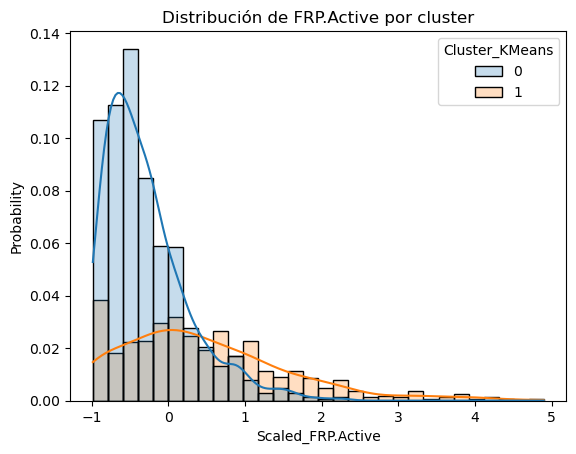

In [38]:
# Histograma
plt.figure()
sns.histplot(data = df_train_scaled,
             x = 'Scaled_FRP.Active',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_KMeans')
plt.title('Distribución de FRP.Active por cluster')
plt.show() ## las graficas estan mas tiradas hacia la izquierda en este caso, los amarillos tienen mas valores positivos

In [59]:
# Podemos Tambien evaluar Medidas de agrupación sobre train.
##  Agrupaos el dataframe df_train_scaled, por la colunma Cluster_Kmeans y calculamos algunas estadisticas agregadas, sobre las otras columnas


resultados = df_train_scaled.groupby('Cluster_KMeans').agg(
    Cant=('Scaled_FRP.Active', 'count'),
    Prom_Tuition=('Scaled_Tuition', 'mean'),
    Median_Tuition=('Scaled_Tuition', 'median'),
    Prom_FRP_Active=('Scaled_FRP.Active', 'mean'),
    Median_FRP_Active=('Scaled_FRP.Active', 'median'),
    
).reset_index()
resultados = resultados.round(2)
print(resultados.head(2))

  Cluster_KMeans  Cant  Prom_Tuition  Median_Tuition  Prom_FRP_Active  \
0              0   323         -0.27           -0.23            -0.30   
1              1    62         -0.70           -0.71             2.66   

   Median_FRP_Active  
0              -0.29  
1               2.36  


In [ ]:
## el grupo cero en entrenamiento, tiene 323 estudiantes cuyo promedio de Tuition es -0.27 y su mediana -0.23 ( negativos porque esta escalado)
## en el grupo uno en entrenamiento, tiene 62 estudiantes cuyo promedio de tuition es -0.70 y su mediana -0.71.
## se cumple al igual que en los graficos que el grupo 1 tiene medidas mas negativas que el grupo cero en la variable Tuition

## Métricas

In [40]:
# Silhouette: es optima cuando es lo mas cercana a 1 posible, mas distanciados los cluster entre si y mas cercanos a dentro
S_train = silhouette_score(X_train,y_kmeans_train)
S_test = silhouette_score(X_test,y_kmeans_test)

# Davies Bouldin es optima cuando es lo mas cercana a 0 posible
DB_train = davies_bouldin_score(X_train,y_kmeans_train)
DB_test = davies_bouldin_score(X_test,y_kmeans_test)

# Inercia debe ser lo mas baja posible
inertia_train = kmeans.inertia_
inertia_test = sum(((X_test[i] - kmeans.cluster_centers_[y_kmeans_test[i]]) ** 2).sum() for i in range(len(X_test)))

# Calinski-Harabasz debe ser lo mas alto posible
CH_train = calinski_harabasz_score(X_train,y_kmeans_train)
CH_test = calinski_harabasz_score(X_test,y_kmeans_test)

In [41]:
print('Métricas de Cluster')
print('')
print('Silhouette')
print('Train: ',round(S_train,3))
print('Test: ',round(S_test,3))
print('')
print('Davies Bouldin')
print('Train: ',round(DB_train,3))
print('Test: ',round(DB_test,3))
print('')
print('Inercia')
print('Train: ',round(inertia_train,3))
print('Test: ',round(inertia_test,3))
print('')
print('Calinski-Harabasz')
print('Train: ',round(CH_train,3))
print('Test: ',round(CH_test,3))

Métricas de Cluster

Silhouette
Train:  0.452
Test:  0.448

Davies Bouldin
Train:  0.968
Test:  0.958

Inercia
Train:  1615.037
Test:  691.091

Calinski-Harabasz
Train:  1280.996
Test:  554.761


In [61]:
## En este caso el Silhouette, nos esta dando en un numero ni tan cerca de uno, ni tan cerca de cero, es un numero muy intermedio y tanto en Traint como en test muy cercanos
## Davies Bouldin, nos dio tanto en Train como en test sobre 0.96 y 0.95, muy cercanos entre si.
## La Inercia entre mas bajo mejor, pero como son sumas tambien depende de la cantidad de registros que quedaron en Traint y en test
## en Calinski Harabasz entre mas alto mejor, pero igual depende de la cantidad de registros que quedaron en test y train.

## estas metricas nos deben ayudar a respaldar que valor de K elijo cuando ejecuto un KMeans, por lo cual debemos tener claro que el escenario optimo es 
## donde se cumplan 

## Silhouette: Lo más cercana a 1 posible
## Davies-Bouldin: Lo más cercano a 0 posible
## Inercia: Lo más baja posible
## Calinski-Harabasz: Lo más alto posible
    
## y esto es lo que vamos a buscar a continuación

## Eligiendo el K Optimo

In [42]:
# vamos a calcular 8 clusters recorriendo k de 2 a 10, calcular las métricas, y elegir el K que más cantidad de premisas cumpla.
# Diccionarios vacios para ser almacenados los resultados
sse,db,slc,cal = {}, {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k,
                    init = 'k-means++', 
                    random_state = 42,
                    max_iter = 100,
                    tol = 0.05,
                    n_init = 10).fit(X_train)    
    clusters = kmeans.labels_ # Extraccion de labels
    sse[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(X_train,clusters) # Calculo del indice de Davies Bouldin
    slc[k] = silhouette_score(X_train,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(X_train,clusters) # Calculo del indice de Calinski-Harabasz

Text(0.5, 1.0, 'Calinski-Harabasz')

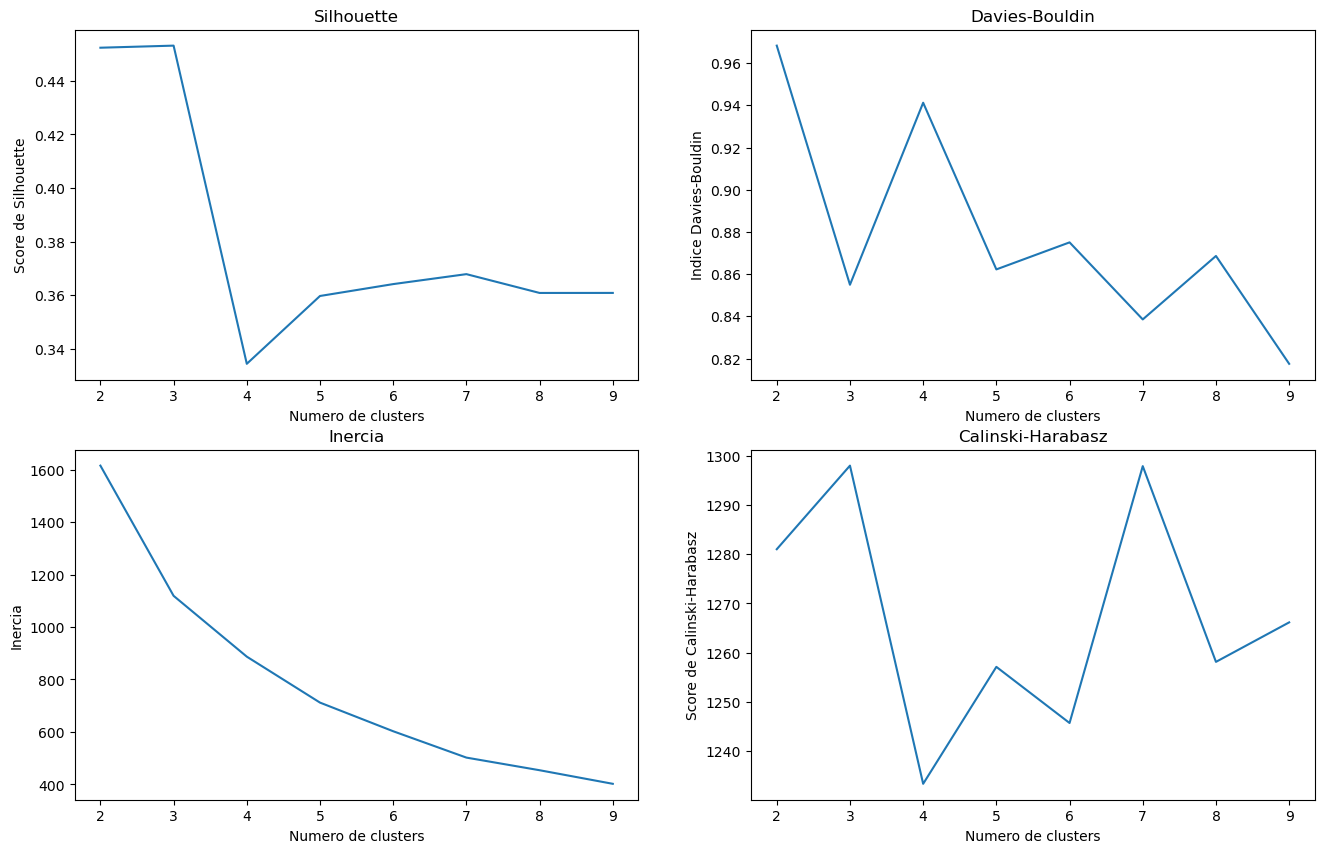

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

axs[0,0].plot(list(slc.keys()), list(slc.values()))
axs[0,0].set_xlabel("Numero de clusters")
axs[0,0].set_ylabel("Score de Silhouette")
axs[0,0].set_title("Silhouette")

axs[0,1].plot(list(db.keys()), list(db.values()))
axs[0,1].set_xlabel("Numero de clusters")
axs[0,1].set_ylabel("Indice Davies-Bouldin")
axs[0,1].set_title("Davies-Bouldin")

axs[1,0].plot(list(sse.keys()), list(sse.values()))
axs[1,0].set_xlabel("Numero de clusters")
axs[1,0].set_ylabel("Inercia")
axs[1,0].set_title("Inercia")

axs[1,1].plot(list(cal.keys()), list(cal.values()))
axs[1,1].set_xlabel("Numero de clusters")
axs[1,1].set_ylabel("Score de Calinski-Harabasz")
axs[1,1].set_title("Calinski-Harabasz")

### Conclusiones:

#### Según Silhouette: Mejor k = 3
#### Según Davies-Bouldin: Mejor k = 6
#### Según Inercia: Se estabiliza aprox. en k = 7, 
#### Según Calinski-Harabasz: Mejor k = 3 aunque en 7 hay otro pico


#### por los resultados anteriores, vamos a probar con K=7

In [44]:
# K Means
## vamos a generar 7 grupos de acuerdo a las conclusiones del K optimo y genero nuevamente todas las metricas.

kmeans = KMeans(n_clusters = 7, 
                init = 'k-means++', 
                random_state = 42,
                max_iter = 100,
                tol = 0.05,
                n_init = 10) 

y_kmeans_train = kmeans.fit_predict(X_train)
y_kmeans_test = kmeans.predict(X_test)

df_train_scaled['Cluster_KMeans'] = y_kmeans_train
df_test_scaled['Cluster_KMeans'] = y_kmeans_test
df_train_scaled.head()

,Scaled_Tuition,Scaled_FRP.Active,Cluster_KMeans
0,-1.318750,4.898290,1
1,-1.343529,0.995683,5
2,-0.538209,1.053931,5
3,0.576849,0.063717,3
4,-1.885571,-0.344018,4


Text(0.5, 1.0, 'K-Means (k = 7) - Test')

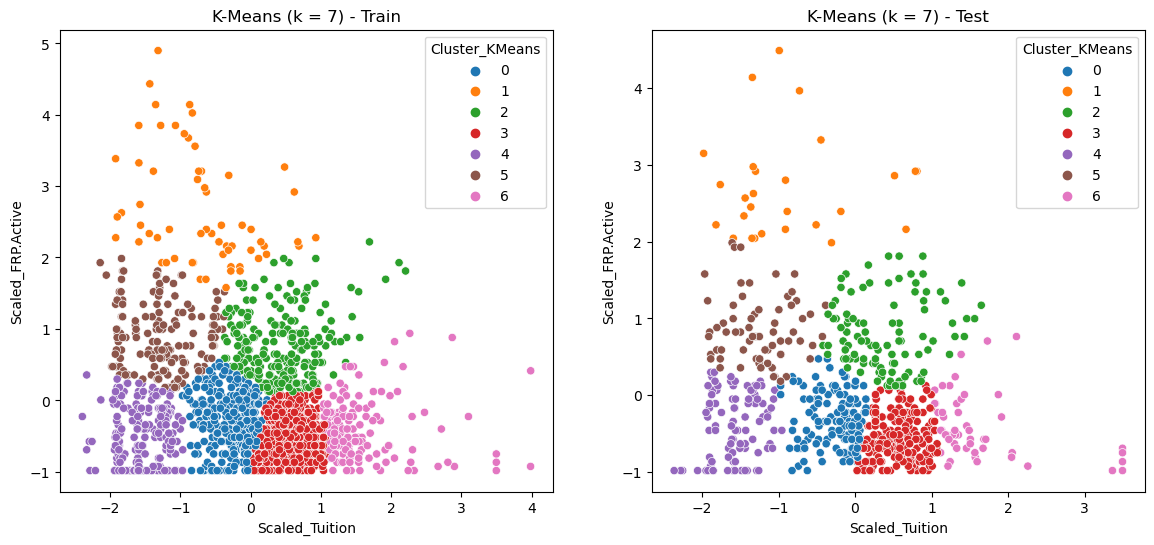

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

df_train_scaled['Cluster_KMeans'] = df_train_scaled['Cluster_KMeans'].astype('category')
sns.scatterplot(data = df_train_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active',
                hue = 'Cluster_KMeans',
                ax = axs[0])
axs[0].set_title('K-Means (k = 7) - Train')


df_test_scaled['Cluster_KMeans'] = df_test_scaled['Cluster_KMeans'].astype('category')
sns.scatterplot(data = df_test_scaled,
                x = 'Scaled_Tuition',
                y = 'Scaled_FRP.Active',
                hue = 'Cluster_KMeans',
                ax = axs[1])
axs[1].set_title('K-Means (k = 7) - Test')

In [ ]:
## Se notan claramente diferenciados los 7 grupos que generé por elegir el K:7 .Test tiene el mismo comportamiento de Train, que fue en donde se generaron todos los Cluster.
## lo que me indica que el algoritmo esta funcionando de manera robusta.

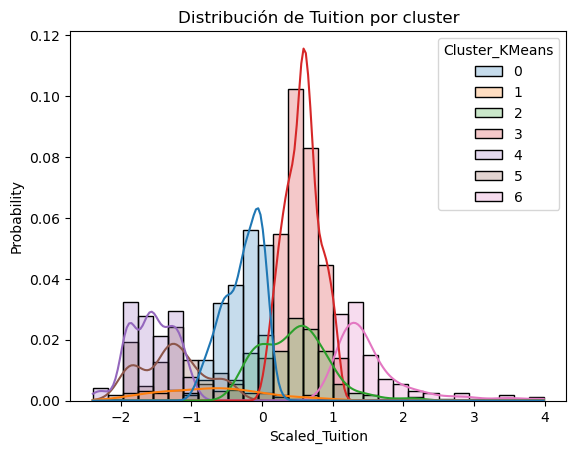

In [46]:
# Histograma
plt.figure()
sns.histplot(data = df_train_scaled,
             x = 'Scaled_Tuition',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_KMeans')
plt.title('Distribución de Tuition por cluster')
plt.show()

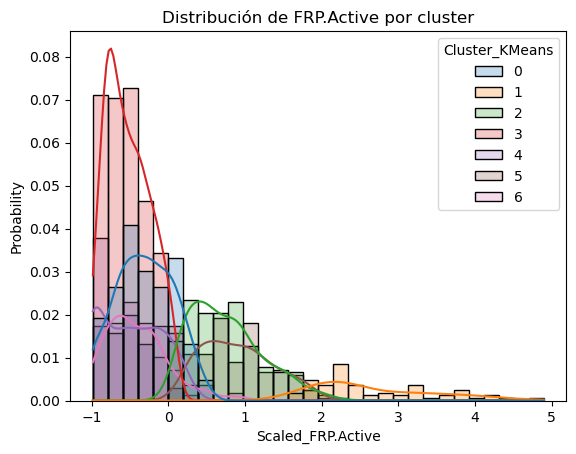

In [47]:
# Histograma
plt.figure()
sns.histplot(data = df_train_scaled,
             x = 'Scaled_FRP.Active',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_KMeans')
plt.title('Distribución de FRP.Active por cluster')
plt.show()

In [48]:
# Silhouette
S_train = silhouette_score(X_train,y_kmeans_train)
S_test = silhouette_score(X_test,y_kmeans_test)

# Davies Bouldin
DB_train = davies_bouldin_score(X_train,y_kmeans_train)
DB_test = davies_bouldin_score(X_test,y_kmeans_test)

# Inercia 
inertia_train = kmeans.inertia_
inertia_test = sum(((X_test[i] - kmeans.cluster_centers_[y_kmeans_test[i]]) ** 2).sum() for i in range(len(X_test)))

# Calinski-Harabasz
CH_train = calinski_harabasz_score(X_train,y_kmeans_train)
CH_test = calinski_harabasz_score(X_test,y_kmeans_test)

In [49]:
print('Métricas de Cluster')
print('')
print('Silhouette')
print('Train: ',round(S_train,3))
print('Test: ',round(S_test,3))
print('')
print('Davies Bouldin')
print('Train: ',round(DB_train,3))
print('Test: ',round(DB_test,3))
print('')
print('Inercia')
print('Train: ',round(inertia_train,3))
print('Test: ',round(inertia_test,3))
print('')
print('Calinski-Harabasz')
print('Train: ',round(CH_train,3))
print('Test: ',round(CH_test,3))

Métricas de Cluster

Silhouette
Train:  0.368
Test:  0.365

Davies Bouldin
Train:  0.839
Test:  0.819

Inercia
Train:  502.228
Test:  216.649

Calinski-Harabasz
Train:  1297.859
Test:  563.629


con este modelo las metricas cambiaron asi: bajo un poco la Silhoutte, bajo el Davies Bouldin, la inercia bajo significativamente, y el Calinski subio significativamente.


Para evaluar si estos siete grupos van a ser buenos predictores, debo cruzarlos contra el target.
Generamos una variable categorica de uno al seis que voy a cruzar con la variable target SPR.Group.Revenue.





## Relacion de los Cluster con el Target

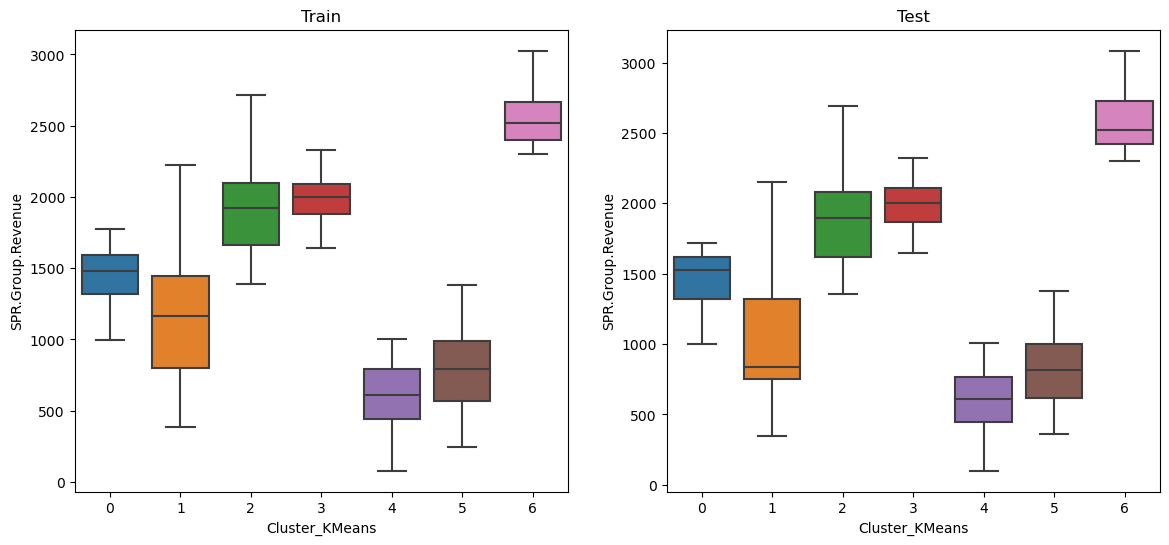

In [50]:
df_train_scaled['SPR.Group.Revenue'] = df_train['SPR.Group.Revenue']
df_test_scaled['SPR.Group.Revenue'] = df_test['SPR.Group.Revenue']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data = df_train_scaled,
            x = 'Cluster_KMeans',
            y = 'SPR.Group.Revenue', 
            showfliers = False,
            ax = axs[0])

axs[0].set_title('Train')

sns.boxplot(data = df_test_scaled,
            x = 'Cluster_KMeans',
            y = 'SPR.Group.Revenue', 
            showfliers = False,
            ax = axs[1])


axs[1].set_title('Test')

plt.show()


Hicimos dos bloxplot,  uno con Train y otro con test en donde el eje X son los cluster (una caja por cada agrupacion) y el eje Y es la variable target ingresos.
Lo que pretendemos ver es que tanta diferencia en los ingresos existe,  para cada uno de los grupos de cluster


Conclusiones
Lo primero es que los boxplots que vemos en train, siguen guardando corcondancia con los boxplost de test, aunque test estuvo ciego en la construccionde los cluster.
Los ingresos mas bajos los tiene el grupo cuatro, tanto en train como en test y tiene sentido, porque son los que menor Tuition tienen (Este es el precio que le cuesta a cada estudiante que paga la totalidad del valor para participar en el programa) adicionalmente tienen menor FRP.Active(es el precio de los que pagaron un seguro de cancelacion bajo)

Por otro lado, los que tienen mayores ingresos, son los de el grupo seis, quienes tienen mayor Tuition ( pagaron mas por el programa y un seguro de cancelacion de valor correspondiente), eso muestra la coherencia entre las variables elegidas y entre los cluster determinados por el modelo




Text(0.5, 1.0, 'Test')

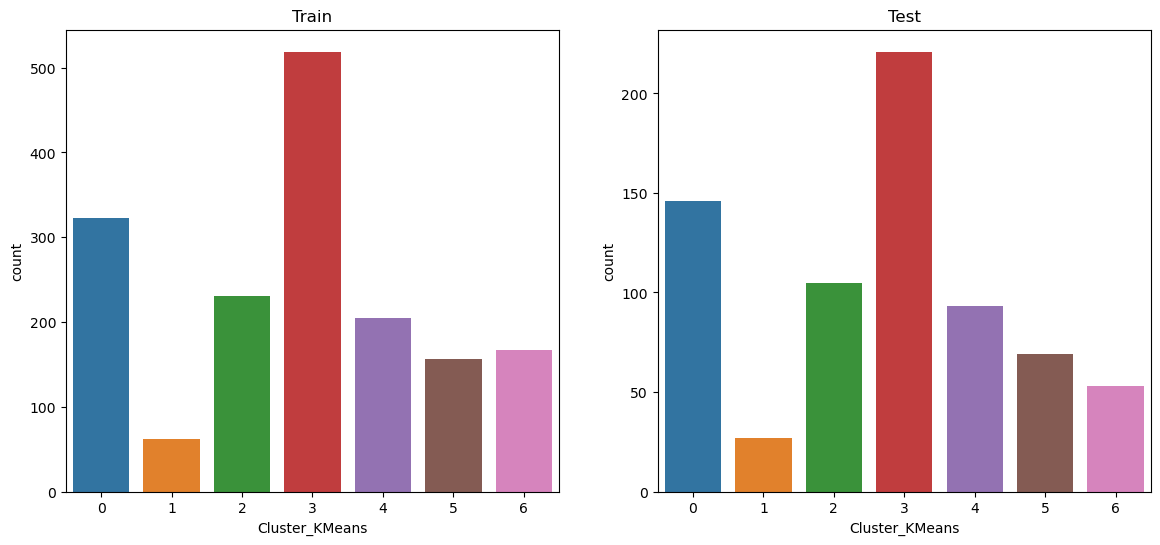

In [51]:
# Ahora necesitamos ver cuantos estudiantes nos quedaron en cada grupo de Cluster.

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data = df_train_scaled,
              x = "Cluster_KMeans",
              ax = axs[0])

axs[0].set_title('Train')

sns.countplot(data = df_test_scaled,
              x = "Cluster_KMeans",
              ax = axs[1])

axs[1].set_title('Test')

Identificamos que en el grupo 1 quedaron 70 estudiantes, de una muestra de 1672 registros, lo cua representa el 4%, lo que me cuestionaria para usar este grupo como una variable independiente, ya que es poco representativo.
el siguiente grupo tiene partcipacion del 8%
el grupo que podria con toda seguridad usar serìa el 3 que tiene casi el 30% de participacion, con poco mas de 500 estudiantes.